In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

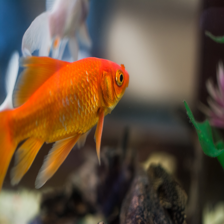

In [4]:
gold_fish=Image.open("C://Users//akash//Downloads//Downloads//gabriel-p-rX1cgGQpgzE-unsplash.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

## gold_fish

In [6]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
result

array([[ 0.29546663,  3.808955  , 10.961736  , ..., -0.7837647 ,
        -0.45315623,  0.17669596]], dtype=float32)

In [9]:
predicted_label_index= np.argmax(result)
predicted_label_index

2

In [10]:
image_labels=[]
with open ("C://Users//akash//DL_CODE//imagetextlabels.txt","r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]    

[" 'background'",
 " 'tench, Tinca tinca',",
 " 'goldfish, Carassius auratus',",
 " 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 'tiger shark, Galeocerdo cuvieri',"]

In [11]:
image_labels[predicted_label_index]

" 'goldfish, Carassius auratus',"

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='C:/Users/akash', untar=True)
data_dir
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

'C:/Users/akash\\datasets\\flower_photos'

In [13]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/akash/datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/akash/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('C:/Users/akash/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

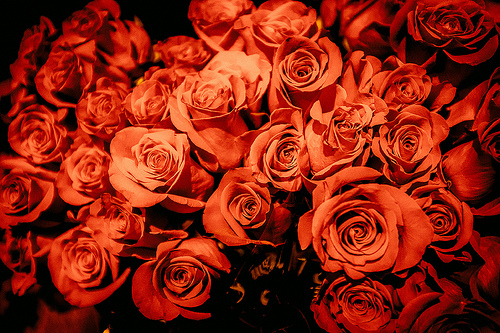

In [17]:
Image.open(str(roses[2]))# can open any pic using this

In [18]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

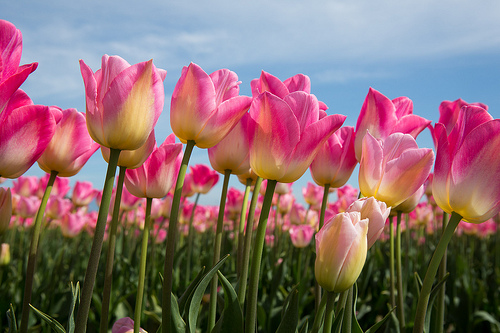

In [19]:
Image.open(str(tulips[3]))

In [20]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_images_dict['tulips']

[WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/akash/datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('C:/Users/a

In [22]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [23]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\akash\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [25]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [26]:
X,y = [],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [27]:
X[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [28]:
X=np.array(X)
y=np.array(y)
#converting to numpy array above

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [30]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [31]:
X_train_scaled

array([[[[0.27843137, 0.3254902 , 0.31764706],
         [0.24705882, 0.28235294, 0.2627451 ],
         [0.25490196, 0.27058824, 0.24705882],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.23137255, 0.25882353, 0.25490196],
         [0.23137255, 0.25490196, 0.23529412],
         [0.25490196, 0.2627451 , 0.23921569],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.21960784, 0.22352941, 0.21960784],
         [0.23921569, 0.24313725, 0.22745098],
         [0.25098039, 0.25098039, 0.22745098],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16470588, 0.15294118]],

        ...,

        [[0.19215686, 0.49803922, 0.37647059],
         [0.14901961, 0.2627451 , 0.19607843]

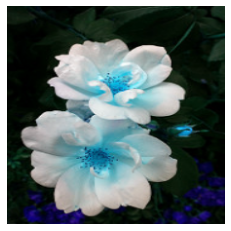

In [32]:
plt.axis('off')
plt.imshow(X[0])

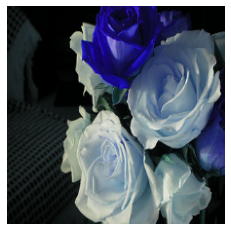

In [33]:
plt.axis('off')
plt.imshow(X[1])

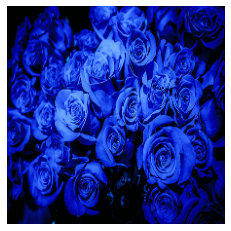

In [34]:
plt.axis('off')
plt.imshow(X[2])

In [35]:
classifier.predict(np.array([X[0],X[1],X[2]]))

array([[ 0.22718725,  0.3929903 ,  1.4730673 , ..., -1.2507938 ,
        -1.9604902 ,  3.8786223 ],
       [ 0.3045682 , -0.5805614 ,  0.71341026, ..., -1.7760271 ,
        -2.332041  ,  4.3593874 ],
       [ 0.23661599, -0.43386507,  0.9326359 , ..., -1.4441879 ,
        -0.85531765,  3.2079213 ]], dtype=float32)

In [36]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [37]:
image_labels[880]

" 'umbrella',"

In [38]:
image_labels[795]

" 'shower curtain',"

In [39]:
#now we are extracting last layer using feture vector

In [40]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [41]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [42]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['acc']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 59s 572ms/step - loss: 0.8051 - acc: 0.6966
Epoch 2/5
86/86 [==============================] - 48s 558ms/step - loss: 0.4151 - acc: 0.8612
Epoch 3/5
86/86 [==============================] - 49s 565ms/step - loss: 0.3237 - acc: 0.8921
Epoch 4/5
86/86 [==============================] - 48s 559ms/step - loss: 0.2679 - acc: 0.9095
Epoch 5/5
86/86 [==============================] - 48s 554ms/step - loss: 0.2324 - acc: 0.9302


In [43]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 17s 549ms/step - loss: 0.3790 - acc: 0.8649


[0.37899941205978394, 0.8649237751960754]

Thus the training accuracy is acheived as 93 percentage and the test accuracy is acheived as 86 percentage respectively.